# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import statistics
import powerlaw

import data_params as input_data_params

# Load Data

In [3]:
DISEASE_PREFIX = input_data_params.disease

# Dataset 1: Original dataset
DATASET_PREFIX_1 = 'prev'
edges1 = pd.read_csv(f'../output/{DISEASE_PREFIX}/{DATASET_PREFIX_1}_{DISEASE_PREFIX}_kg_edges.csv', header=0)
print(f'Loaded {edges1.shape[0]} edges from dataset 1 with columns:', edges1.columns.values)

nodes1 = pd.read_csv(f'../output/{DISEASE_PREFIX}/{DATASET_PREFIX_1}_{DISEASE_PREFIX}_kg_nodes.csv', header=0)
print(f'Loaded {nodes1.shape[0]} nodes from dataset 1 with columns:', nodes1.columns.values)

print('\n')

# Dataset 2: Restructured dataset
DATASET_PREFIX_2 = 'restr'
edges2 = pd.read_csv(f'../output/{DISEASE_PREFIX}/{DATASET_PREFIX_2}_{DISEASE_PREFIX}_kg_edges.csv', header=0)
print(f'Loaded {edges2.shape[0]} edges from dataset 2 with columns:', edges2.columns.values)

nodes2 = pd.read_csv(f'../output/{DISEASE_PREFIX}/{DATASET_PREFIX_2}_{DISEASE_PREFIX}_kg_nodes.csv', header=0)
print(f'Loaded {nodes2.shape[0]} nodes from dataset 2 with columns:', nodes2.columns.values)

Loaded 96138 edges from dataset 1 with columns: ['id' 'subject' 'object' 'relation_id' 'relation_label' 'relation_iri']
Loaded 9885 nodes from dataset 1 with columns: ['id' 'label' 'iri' 'semantic' 'taxon_id' 'taxon_label']


Loaded 97068 edges from dataset 2 with columns: ['id' 'subject' 'object' 'relation_id' 'relation_label' 'relation_iri']
Loaded 9897 nodes from dataset 2 with columns: ['id' 'label' 'iri' 'semantic']


# Node Types and Edge Types Occurrences

Count node types

In [8]:
def count_node_types(nodes: pd.DataFrame, set_name, save=False):
    node_type_count = pd.DataFrame()
    
    total_nodes = nodes.shape[0]
    print('Total nodes', total_nodes)
    
    counts = nodes['semantic'].value_counts()
    
    for indx, value in counts.items():
        count_dict = {
            'Node Type': indx,
            'Count': value,
            'Percentage': value / total_nodes * 100
        }
        node_type_count = pd.concat([node_type_count, pd.DataFrame([count_dict])], ignore_index=True)
    
    node_type_count['Percentage'] = node_type_count['Percentage'].transform(lambda x: '{:,.2f}%'.format(x))
    
    if save:
        node_type_count.to_csv(f'../output/{DISEASE_PREFIX}/{set_name}_{DISEASE_PREFIX}_node_types.csv', index=False)
    
    return node_type_count

In [9]:
node_types_1 = count_node_types(nodes1, DATASET_PREFIX_1, save=True)
node_types_1

Total nodes 9885


,Node Type,Count,Percentage
0,DISO,5324,53.86%
1,ORTH,3222,32.59%
2,VARI,510,5.16%
3,GENO,320,3.24%
4,GENE,218,2.21%
5,DRUG,153,1.55%
6,PHYS,104,1.05%
7,ANAT,34,0.34%


In [10]:
node_types_2 = count_node_types(nodes2, DATASET_PREFIX_2, save=True)
node_types_2

Total nodes 9897


,Node Type,Count,Percentage
0,phenotype,5351,54.07%
1,gene,3559,35.96%
2,variant,642,6.49%
3,drug,153,1.55%
4,molecular function,89,0.90%
5,taxon,24,0.24%
6,gene product,22,0.22%
7,genotype,21,0.21%
8,disease,19,0.19%
9,biological process,15,0.15%


Count edge types

In [13]:
def count_edge_types(edges: pd.DataFrame, set_name):
    edge_type_count = pd.DataFrame()
    
    total_edges = edges.shape[0]
    print('Total edges', total_edges)
    
    counts = edges['relation_label'].value_counts()
    
    for indx, value in counts.items():
        count_dict = {
            'Edge Type': indx,
            'Count': value,
            'Percentage': value / total_edges * 100
        }
        edge_type_count = pd.concat([edge_type_count, pd.DataFrame([count_dict])], ignore_index=True)
    
    edge_type_count['Percentage'] = edge_type_count['Percentage'].transform(lambda x: '{:,.2f}%'.format(x))
    edge_type_count.to_csv(f'../output/{DISEASE_PREFIX}/{set_name}_{DISEASE_PREFIX}_edge_types.csv', index=False)
    
    return edge_type_count

In [14]:
count_edge_types(edges1, DATASET_PREFIX_1)

Total edges 96138


,Edge Type,Count,Percentage
0,in 1 to 1 orthology relationship with,32434,33.74%
1,in orthology relationship with,26102,27.15%
2,has phenotype,15812,16.45%
3,interacts with,13264,13.80%
4,is part of,2169,2.26%
5,involved in,2166,2.25%
6,enables,1198,1.25%
7,expressed in,973,1.01%
8,has affected feature,519,0.54%
9,pathogenic for condition,503,0.52%


In [15]:
count_edge_types(edges2, DATASET_PREFIX_2)

Total edges 97068


,Edge Type,Count,Percentage
0,in orthology relationship with,58536,60.30%
1,causes condition,15948,16.43%
2,interacts with,13264,13.66%
3,enables,5016,5.17%
4,found in,1889,1.95%
5,has affected feature,519,0.53%
6,involved in,517,0.53%
7,associated with phenotype,411,0.42%
8,contributes to condition,385,0.40%
9,targets,203,0.21%


# Create Graph

## Merge nodes with edges

In [16]:
def get_kg(edges: pd.DataFrame, nodes: pd.DataFrame):
    assert 'subject' in list(edges.columns.values)
    assert 'object' in list(edges.columns.values)
    assert 'id' in list(nodes.columns.values)
    
    kg_df = pd.merge(edges, nodes,
                     left_on='subject', right_on='id',
                     how='inner')
    
    kg_df = kg_df.copy()[['id_x', 'subject', 'semantic', 'relation_id', 'relation_label', 'object']]
    kg_df = kg_df.rename(columns={'id_x': 'edge_id', 'subject': 'subject_id', 'semantic': 'subject_class'})
    
    kg_df = pd.merge(kg_df, nodes,
                     left_on='object', right_on='id',
                     how='inner')
    
    kg_df = kg_df.copy()[['edge_id', 'subject_id', 'subject_class', 'relation_id', 'relation_label', 'object', 'semantic']]
    kg_df = kg_df.rename(columns={'object': 'object_id', 'semantic': 'object_class'})
    
    return kg_df

In [17]:
kg_df1 = get_kg(edges1, nodes1)
kg_df1

,edge_id,subject_id,subject_class,relation_id,relation_label,object_id,object_class
0,630a7d4f83cf1a117b895491bd63c04b,HGNC:8546,GENE,RO:HOM0000020,in 1 to 1 orthology relationship with,ENSEMBL:ENSMMUG00000011274,ORTH
1,816f8d38c57bf15ac78b8385c4148cf9,WormBase:WBGene00000912,ORTH,RO:0002200,has phenotype,WBPhenotype:0001090,DISO
2,db87bd2695a3b5b1b95daf53cdba3481,ENSEMBL:ENSPTRG00000000158,ORTH,RO:HOM0000020,in 1 to 1 orthology relationship with,HGNC:9081,GENE
3,b4741671378fedf9ec41192eb749b7f5,ENSEMBL:ENSACAG00000001165,ORTH,RO:HOM0000020,in 1 to 1 orthology relationship with,ZFIN:ZDB-GENE-030616-499,ORTH
4,7ec2f69df1da5d19b61e14aa3f038865,ENSEMBL:ENSFCAG00000005653,ORTH,RO:HOM0000020,in 1 to 1 orthology relationship with,ZFIN:ZDB-GENE-060616-382,ORTH
...,...,...,...,...,...,...,...
96133,5687ba7d66fa4cc16a4132c1a5597520,ENSEMBL:ENSACAG00000014816,ORTH,RO:HOM0000020,in 1 to 1 orthology relationship with,ENSEMBL:ENSSSCG00055001944,ORTH
96134,16510308699528e3e5c6b02d39f7da89,MGI:3045353,ORTH,RO:HOM0000017,in orthology relationship with,WormBase:WBGene00001650,ORTH
96135,dca3c2eb40ddec6080db509f947741bd,MGI:1100851,ORTH,BFO:0000050,is part of,GO:0005737,PHYS
96136,271dde97a1a1821d7eff2f81b396fd7e,HGNC:9083,GENE,RO:0002434,interacts with,HGNC:2584,GENE


In [18]:
kg_df2 = get_kg(edges2, nodes2)
kg_df2

,edge_id,subject_id,subject_class,relation_id,relation_label,object_id,object_class
0,1eb042d3ad2f1cda0a602fc5be9a0793,MGI:95489,gene,RO:0003303,causes condition,HP:0100625,phenotype
1,e19ec199da3a008272d887dd92608f6d,ZFIN:ZDB-FISH-180503-6,genotype,CustomRO:expressesgene,expresses gene,ZFIN:ZDB-GENE-030131-9102,gene
2,08dfe632061ba01924e0a5449e0e1635,MGI:88462,gene,RO:0002327,enables,GO:0062023,molecular function
3,d7ec998ef2bc79d0f8ec1bd54549766c,ENSEMBL:ENSCAFG00000005814,gene,RO:HOM0000017,in orthology relationship with,ENSEMBL:ENSMMUG00000062243,gene
4,e34e770be18a79dd2c2efacdff419d42,MGI:96610,gene,RO:0003303,causes condition,MP:0001711,phenotype
...,...,...,...,...,...,...,...
97063,513f928e6ebef9c2684641fe3d60854b,ClinVarVariant:575257,variant,RO:0003303,causes condition,MONDO:0008146,disease
97064,a4840bcc093ba3a6f7de0b5176ecd5f2,Xenbase:XB-GENE-490472,gene,RO:HOM0000017,in orthology relationship with,WormBase:WBGene00001650,gene
97065,f82f311a124814ce23ec16b21cf8077a,ENSEMBL:ENSMODG00000011516,gene,RO:HOM0000017,in orthology relationship with,ENSEMBL:ENSCAFG00000014145,gene
97066,2eabfe2e475da68d013dfb3472786f81,MGI:96614,gene,RO:0003303,causes condition,MP:0002169,phenotype


Generate graph objects for both datasets.

In [19]:
def get_graph(edgelist: pd.DataFrame, nodelist: pd.DataFrame):
    assert 'subject_id' in list(edgelist.columns.values)
    assert 'object_id' in list(edgelist.columns.values)
    assert 'relation_label' in list(edgelist.columns.values)
    assert 'edge_id' in list(edgelist.columns.values)
    
    G = nx.from_pandas_edgelist(edgelist, source='subject_id', target='object_id', edge_attr='relation_label',
                                create_using=nx.DiGraph(), edge_key='edge_id')
    
    node_attrs = {}
    for ind, node in nodelist.iterrows():
        attr_dict = {'class': node.semantic}
        node_attrs[node.id] = attr_dict
        
    nx.set_node_attributes(G, node_attrs)
    
    for node in G.nodes(data=True):
        print('First node in graph:', node)
        break

    for edge in G.edges(data=True):
        print('First edge in graph:', edge)
        break

    print('Total number of edges is {}'.format(G.number_of_edges()))
    print('Total number of nodes is {}'.format(G.number_of_nodes()))

    return G

In [20]:
print('Dataset 1 graph:')
G1 = get_graph(kg_df1, nodes1)
print('Dataset 2 graph:')
G2 = get_graph(kg_df2, nodes2)

Dataset 1 graph:
First node in graph: ('HGNC:8546', {'class': 'GENE'})
First edge in graph: ('HGNC:8546', 'ENSEMBL:ENSMMUG00000011274', {'relation_label': 'in 1 to 1 orthology relationship with'})
Total number of edges is 96131
Total number of nodes is 9885
Dataset 2 graph:
First node in graph: ('MGI:95489', {'class': 'gene'})
First edge in graph: ('MGI:95489', 'HP:0100625', {'relation_label': 'causes condition'})
Total number of edges is 97064
Total number of nodes is 9897


In [22]:
nx.write_gexf(G1, f"../output/{DISEASE_PREFIX}/{DATASET_PREFIX_1}_{DISEASE_PREFIX}_kg.gexf")

In [23]:
nx.write_gexf(G2, f"../output/{DISEASE_PREFIX}/{DATASET_PREFIX_2}_{DISEASE_PREFIX}_kg.gexf")


# Plots

In [24]:
def plot_degree_histogram(G, title):
    degree_freq = nx.degree_histogram(G)
    
    sorted_degree_freq = sorted(degree_freq, reverse=True)
    fit = powerlaw.Fit(sorted_degree_freq)
    
    plt.figure(figsize=(8, 6))
    
    fig = fit.plot_pdf(color='b', linewidth=2)
    fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig)
    
    alpha = '{:.2f}'.format(fit.power_law.alpha)
    
    fig.set_title(f'{title} Fit Onto Power Law with α={alpha}', fontdict={'fontsize': 10})
    
    degrees = range(len(degree_freq))

    plt.figure(figsize=(8, 6)) 
    
    plt.loglog(degrees[1:], degree_freq[1:], linewidth = '1')
    plt.xlabel('(Log) Degree')
    plt.ylabel('(Log) Frequency')
    plt.title(title)
    plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


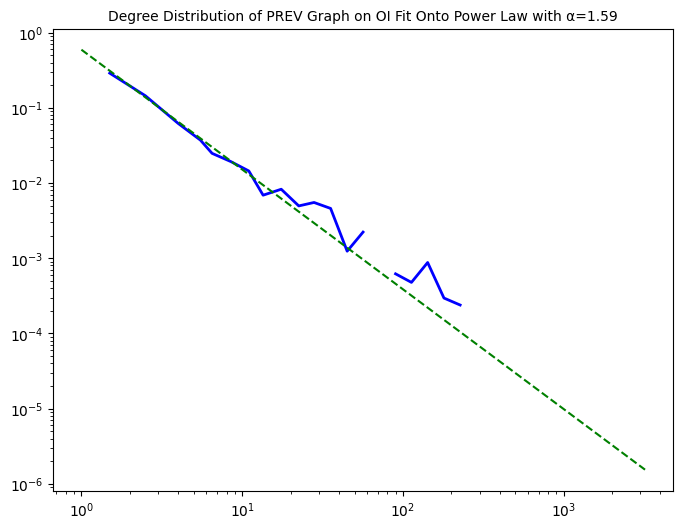

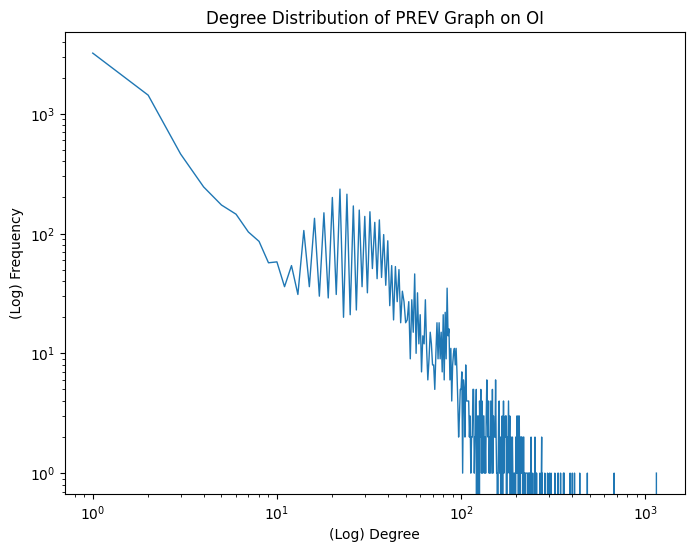

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


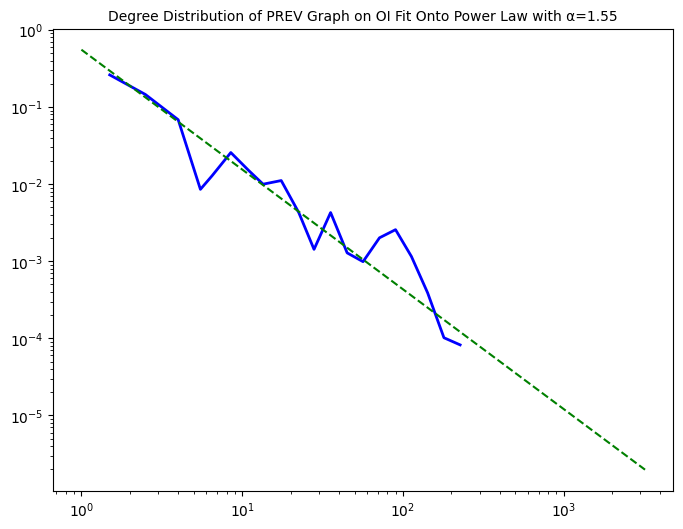

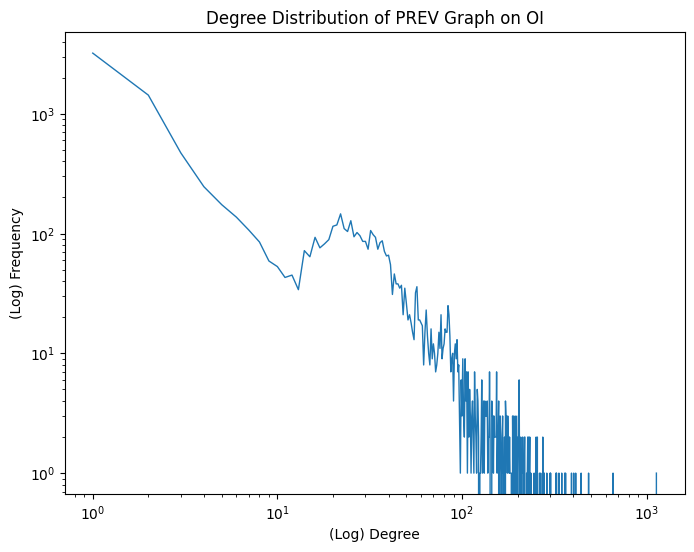

In [27]:
plot_degree_histogram(G1, f'Degree Distribution of {DATASET_PREFIX_1.upper()} Graph on {DISEASE_PREFIX.upper()}')
plot_degree_histogram(G2, f'Degree Distribution of {DATASET_PREFIX_1.upper()} Graph on {DISEASE_PREFIX.upper()}')

# Global Statistics

The density statistic represents the proportion of possible relationships in the network that are actually present. The value ranges from 0 to 1, with the lower limit corresponding to networks with no relationships and the upper limit representing networks with all possible relationships. The closer the value is to 1, the more dense is the network and the more cohesive are the nodes in the network.

In [28]:
density_G1 = nx.density(G1)
density_G2 = nx.density(G2)

print('Density of G1:', density_G1)
print('Density of G2:', density_G2)

Density of G1: 0.000983906998471086
Density of G2: 0.0009910485437353161


In [29]:
avg_clu_coeff_G1 = nx.average_clustering(G1)
avg_clu_coeff_G2 = nx.average_clustering(G2)

print('Average Clustering Coefficient of G1:', avg_clu_coeff_G1)
print('Average Clustering Coefficient of G2:', avg_clu_coeff_G2)

Average Clustering Coefficient of G1: 0.34487698732322297
Average Clustering Coefficient of G2: 0.3328002170086808


The diameter of a network is the maximum length of any shortest path between an input and an output.

In [30]:
diam_G1 = nx.diameter(G1.to_undirected())
diam_G2 = nx.diameter(G2.to_undirected())

print('Diameter of G1:', diam_G1)
print('Diameter of G2:', diam_G2)

KeyboardInterrupt: 

In [ ]:
path_length_G1 = nx.average_shortest_path_length(G1.to_undirected())
path_length_G2 = nx.average_shortest_path_length(G2.to_undirected())

print('Average shortest path length of G1:', path_length_G1)
print('Average shortest path length of G2:', path_length_G2)

Average shortest path length of G1: 3.7645396773628224
Average shortest path length of G2: 3.805484433239723


In [ ]:
def get_avg_degree(G):
    degrees = G.degree()
    count = 0
    degrees_total = 0

    for _, value in degrees:
        count += 1
        degrees_total += value
        
    return degrees_total / count

def get_highest_degree(G):
    degrees = G.degree()
    highest_degree = 0

    for _, value in degrees:
        if value > highest_degree:
            highest_degree = value
        
    return highest_degree

def get_median_degree(G):
    degrees = G.degree()
    all_degrees = []
    
    for _, value in degrees:
        all_degrees.append(value)
        
    return statistics.median(all_degrees)

print('Average degree of G1:', get_avg_degree(G1))
print('Median degree of G1:', get_median_degree(G1))
print('Highest degree of G1:', get_highest_degree(G1))

print('Average degree of G2:', get_avg_degree(G2))
print('Median degree of G2:', get_median_degree(G2))
print('Highest degree of G2:', get_highest_degree(G2))

Average degree of G1: 17.322387518142236
Median degree of G1: 2.0
Highest degree of G1: 1682
Average degree of G2: 17.414475467606398
Median degree of G2: 2
Highest degree of G2: 1651


In [ ]:
def fill_semantic_dict(semantic_dict, semantic, add_value):
    if semantic in semantic_dict:
        semantic_dict[semantic] += add_value
    else:
        semantic_dict[semantic] = add_value
        
    return semantic_dict

def fill_semantic_dict2(semantic_dict, semantic, append_value):
    if semantic in semantic_dict:
        semantic_dict[semantic].append(append_value)
    else:
        semantic_dict[semantic] = [append_value]
        
    return semantic_dict

def get_degree_per_semantic(G, nodes, set_name, save=False):
    degrees = G.degree()
    semantic_degrees = {}
    semantic_totals = {}
    semantic_degree_per_node = {}

    for node_degree in degrees:
        node_id, degree = node_degree
        
        node_info = nodes.loc[nodes['id'] == node_id]
        node_semantic = node_info['semantic'].values[0]
        
        semantic_totals = fill_semantic_dict(semantic_totals, node_semantic, 1)
        semantic_degrees = fill_semantic_dict(semantic_degrees, node_semantic, degree)
        semantic_degree_per_node = fill_semantic_dict2(semantic_degree_per_node, node_semantic, degree)
    
    semantic_degrees_list = []
    for k in semantic_degrees.keys():
        avg_degree = semantic_degrees[k] / semantic_totals[k]
        
        median_degree = statistics.median(semantic_degree_per_node[k])
        
        semantic_degrees_list.append([k, avg_degree, median_degree])
        
    semantic_degrees_df = pd.DataFrame(semantic_degrees_list, columns = ['Node Type' , 'Average Degree', 'Median Degree'])
    semantic_degrees_df['Average Degree'] = semantic_degrees_df['Average Degree'].transform(lambda x: '{:,.2f}'.format(x))
    
    if save:
        semantic_degrees_df.to_csv(f'../output/{DISEASE_PREFIX}/{set_name}_{DISEASE_PREFIX}_node_degrees.csv', index=False)
    
    return semantic_degrees_df

In [ ]:
node_degrees_1 = get_degree_per_semantic(G1, nodes1, DATASET_PREFIX_1)
node_degrees_1

,Node Type,Average Degree,Median Degree
0,ORTH,42.14,34.0
1,GENO,10.41,2.0
2,GENE,106.78,93.0
3,DISO,3.15,1.0
4,PHYS,58.06,25.0
5,DRUG,1.55,1.0
6,ANAT,55.75,30.0
7,VARI,1.98,2.0


In [ ]:
node_degrees_2 = get_degree_per_semantic(G2, nodes2, DATASET_PREFIX_2)
node_degrees_2

,Node Type,Average Degree,Median Degree
0,variant,2.30,2.0
1,gene,46.36,35.0
2,gene product,10.74,5.0
3,disease,157.80,19.5
4,genotype,9.44,5.5
5,biological artifact,2.61,3.0
6,drug,1.55,1.0
7,phenotype,2.98,1.0
8,taxon,82.12,89.0
9,molecular function,58.47,24.0


In [62]:
def get_semantic_stats(node_types, node_degrees, set_name):
    df = pd.merge(node_types, node_degrees, left_on='Node Type', right_on='Node Type', how='inner')
    
    df.to_csv(f'../output/{DISEASE_PREFIX}/{set_name}_{DISEASE_PREFIX}_node_type_stats.csv', index=False)
    
    return df    

In [68]:
get_semantic_stats(node_types_1, node_degrees_1, DATASET_PREFIX_1)

,Node Type,Count,Percentage,Average Degree,Median Degree
0,DISO,5452,49.46%,3.15,1.0
1,ORTH,3232,29.32%,42.14,34.0
2,VARI,1131,10.26%,1.98,2.0
3,GENO,617,5.60%,10.41,2.0
4,DRUG,293,2.66%,1.55,1.0
5,GENE,229,2.08%,106.78,93.0
6,PHYS,50,0.45%,58.06,25.0
7,ANAT,20,0.18%,55.75,30.0


In [64]:
get_semantic_stats(node_types_2, node_degrees_2, DATASET_PREFIX_2)

,Node Type,Count,Percentage,Average Degree,Median Degree
0,phenotype,5679,51.31%,2.98,1.0
1,gene,3553,32.10%,46.36,35.0
2,variant,1281,11.57%,2.30,2.0
3,drug,293,2.65%,1.55,1.0
4,biological artifact,70,0.63%,2.61,3.0
5,genotype,68,0.61%,9.44,5.5
6,molecular function,49,0.44%,58.47,24.0
7,gene product,39,0.35%,10.74,5.0
8,taxon,24,0.22%,82.12,89.0
9,disease,10,0.09%,157.80,19.5


# Graph Visualization

In [65]:
def get_metagraph(edgelist: pd.DataFrame, dataset: int):
    assert 'object_class' in list(edgelist.columns.values)
    assert 'subject_class' in list(edgelist.columns.values)
    assert 'relation_label' in list(edgelist.columns.values)

    metagraph = edgelist[['object_class', 'subject_class', 'relation_label']]
    metagraph = metagraph.drop_duplicates().reset_index()
    
    G = nx.MultiGraph()
    for ind, edge in metagraph.iterrows():
        G.add_edge(edge['object_class'], edge['subject_class'], edge_label=edge['relation_label'])
    
    if dataset == 1:
        d = {
                'ORTH': 0, 
                'DISO': 1, 
                'GENE': 2, 
                'GENO': 3, 
                'VARI': 4, 
                'ANAT': 5, 
                'DRUG':6 , 
                'PHYS': 7}
        font_color = 'white'
        cmap_name = 'viridis'
    else:
        d = {
                'molecular function': 0, 
                'cellular component': 1, 
                'taxon': 2,
                'biological artifact': 3,
                'gene': 4,
                'genotype': 5,
                'variant': 6,
                'disease': 7,
                'phenotype': 8,
                'biological process': 9,
                'gene product': 10,
                'drug': 11
            }
        font_color = 'black'
        cmap_name = 'Spectral'
    values = [d.get(node, 0.25) for node in G.nodes()]
    
    plt.figure(figsize=(7,7))
    nx.draw(G, cmap=plt.get_cmap(cmap_name), node_color=values, font_color=font_color, font_size=7, with_labels=True, node_size=1600)

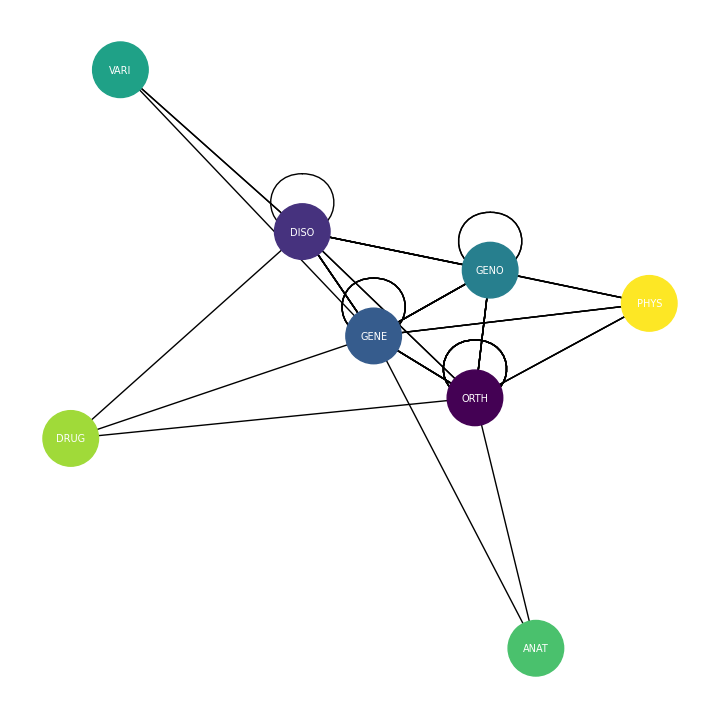

In [66]:
get_metagraph(kg_df1, 1)

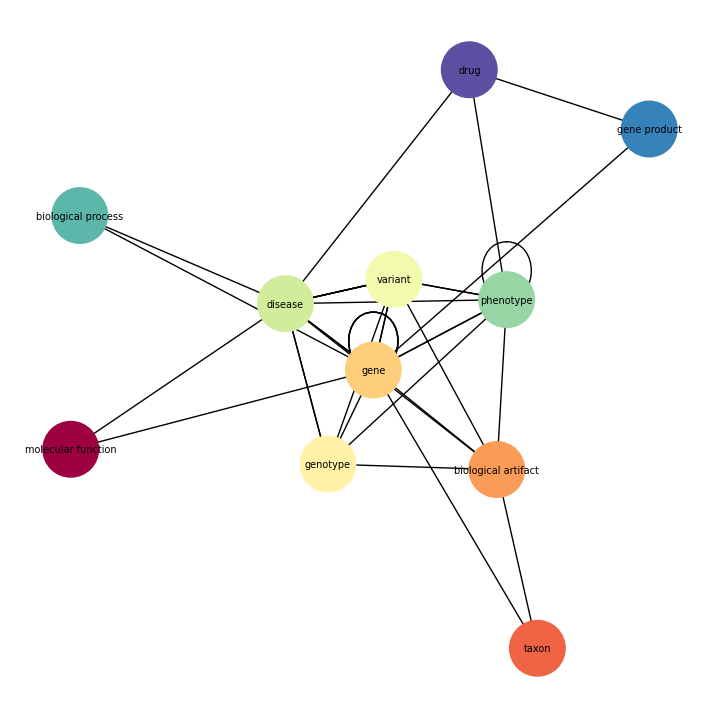

In [67]:
get_metagraph(kg_df2, 2)